In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
train = pd.read_csv('application_train.csv')

In [3]:
train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [4]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
train.isnull().sum().sort_values(ascending=False).head()

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
dtype: int64

In [7]:
train.isnull().sum().mean() / train.shape[0]
#avg percent null

0.24395941907129431

In [8]:
oneHot=pd.get_dummies(train)

In [9]:
oneHot.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [10]:
oneHot.dtypes.value_counts()

uint8      140
float64     65
int64       41
dtype: int64

In [11]:
oneHot['TARGET'].value_counts(normalize=True) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

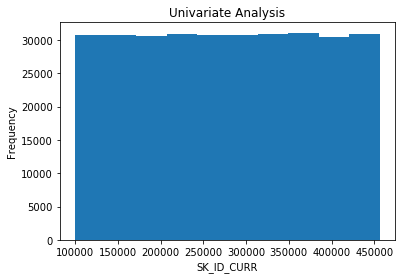

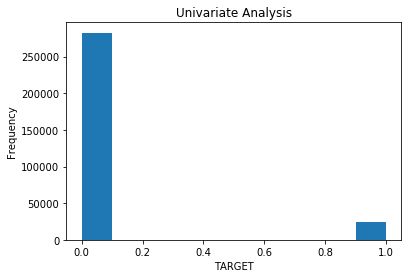

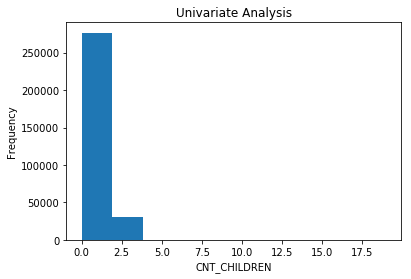

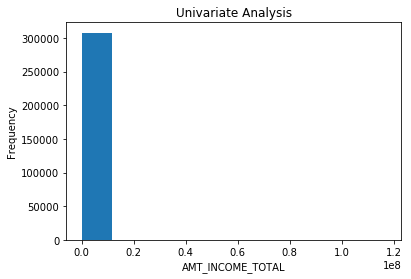

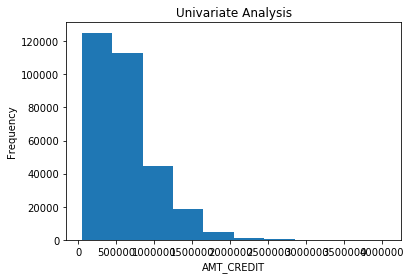

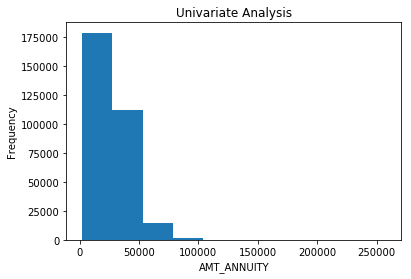

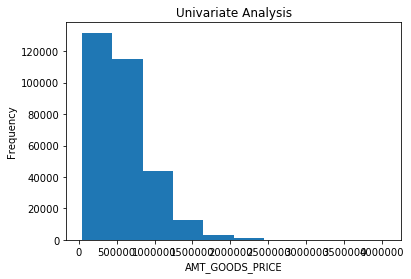

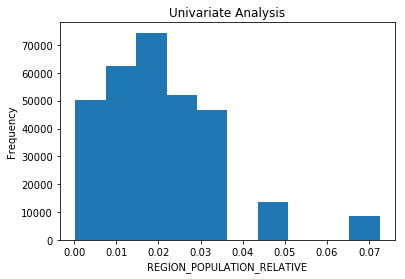

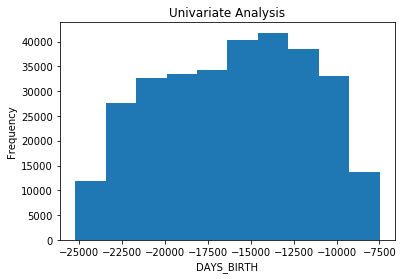

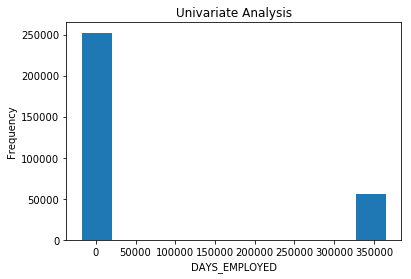

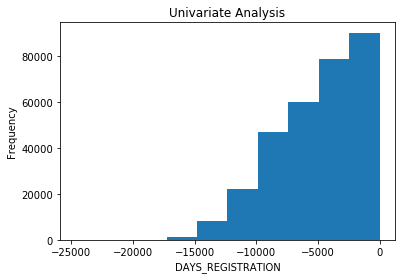

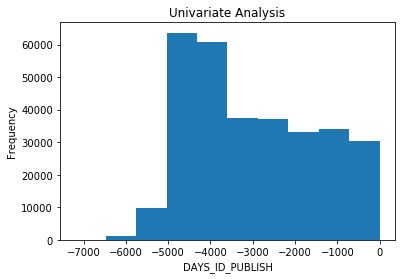

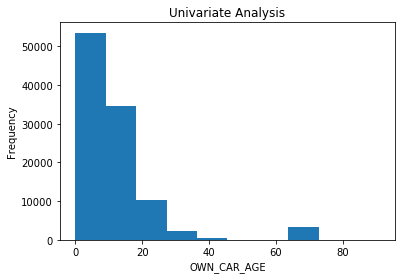

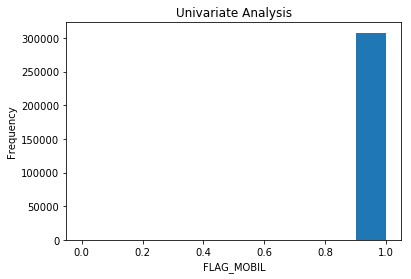

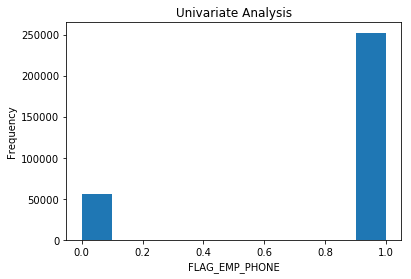

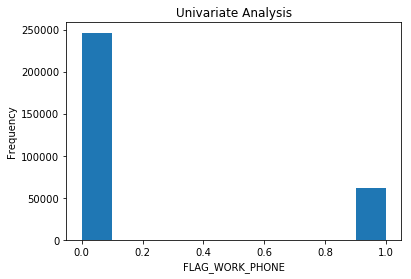

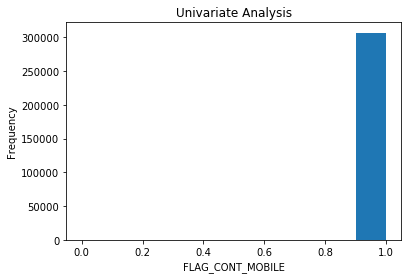

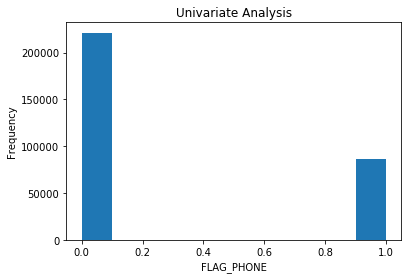

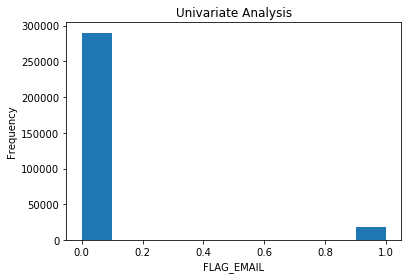

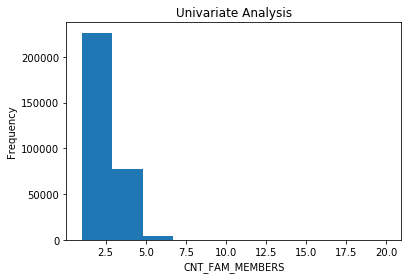

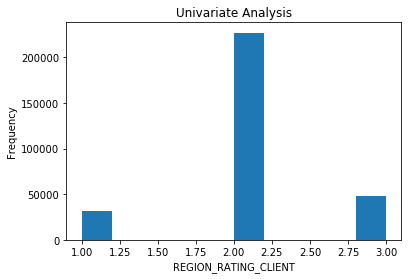

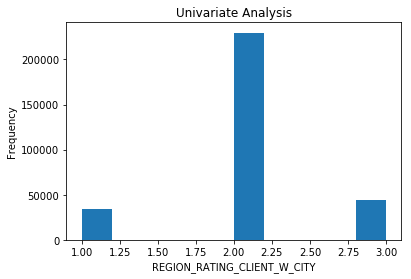

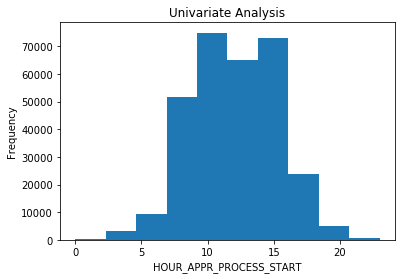

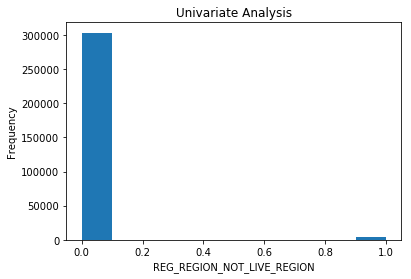

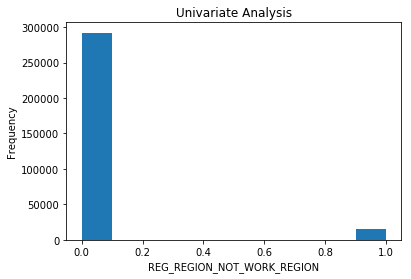

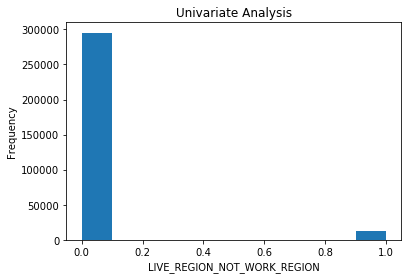

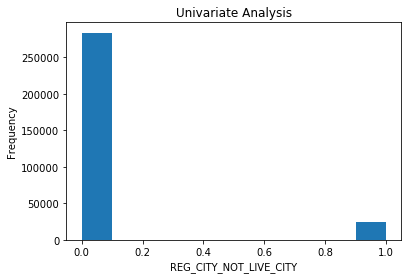

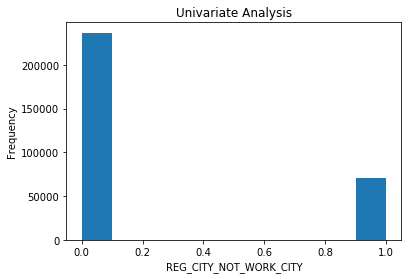

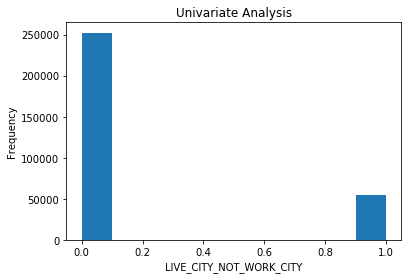

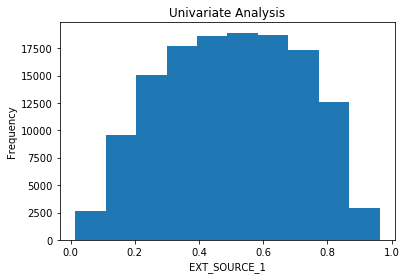

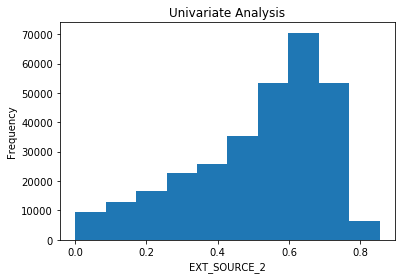

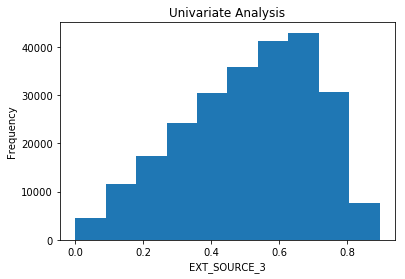

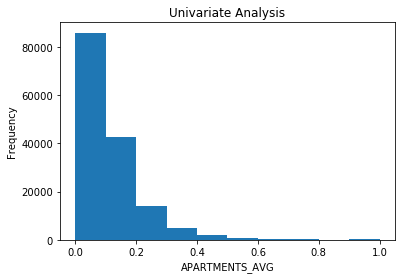

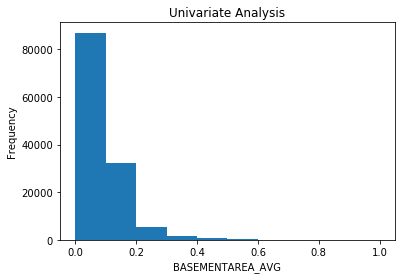

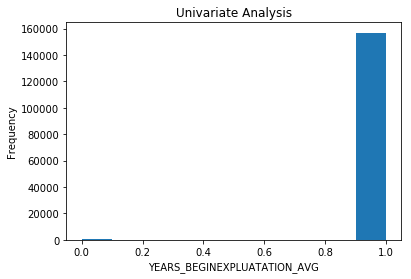

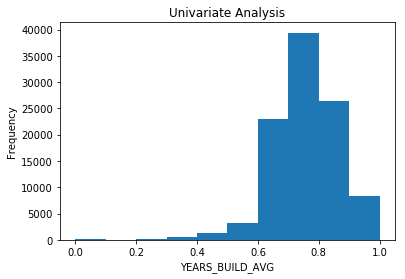

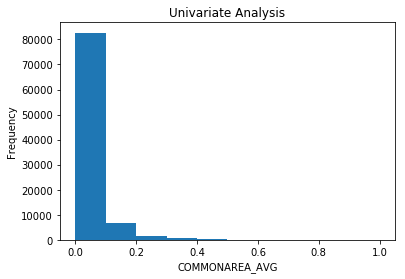

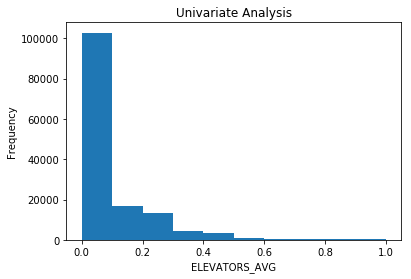

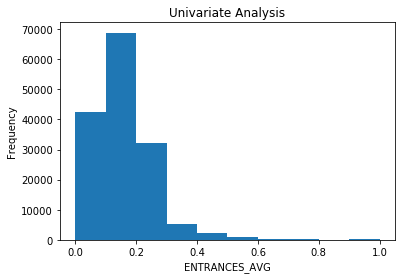

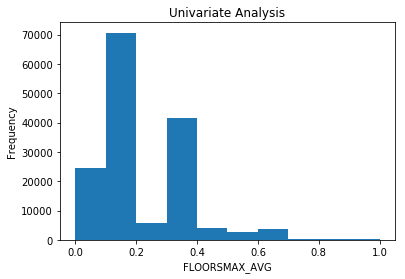

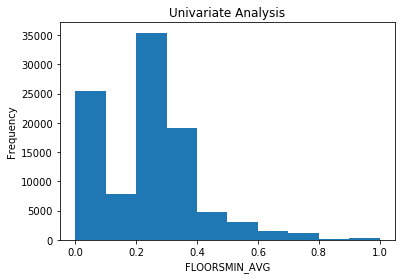

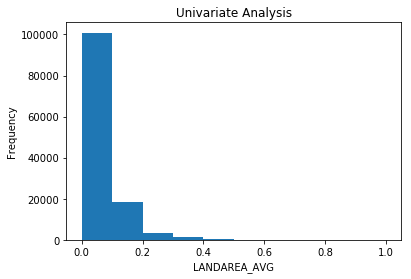

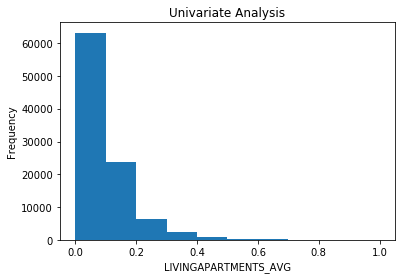

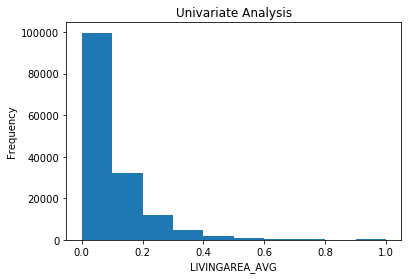

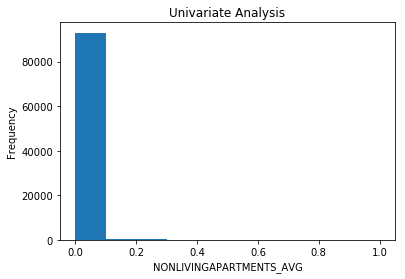

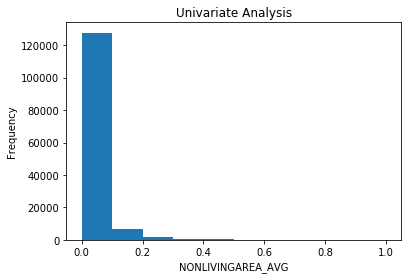

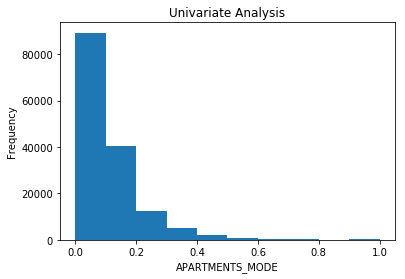

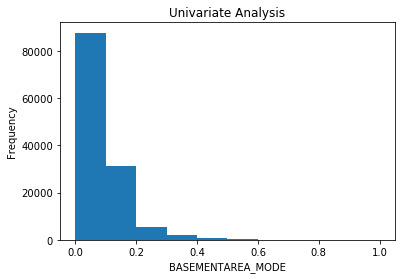

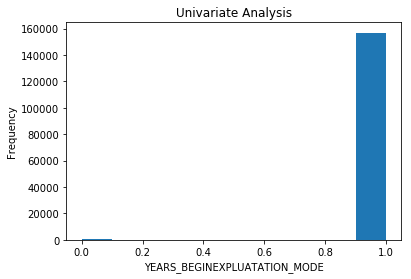

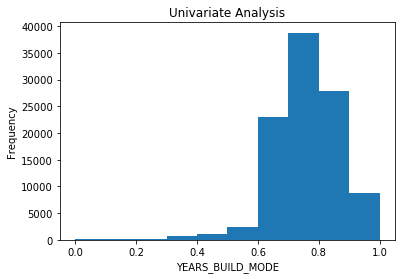

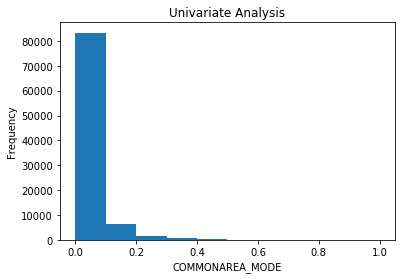

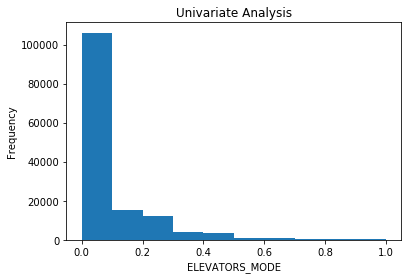

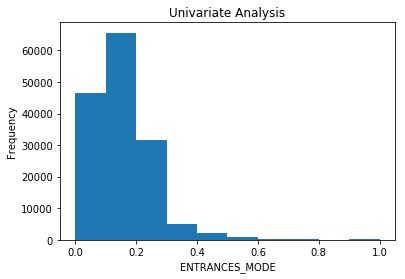

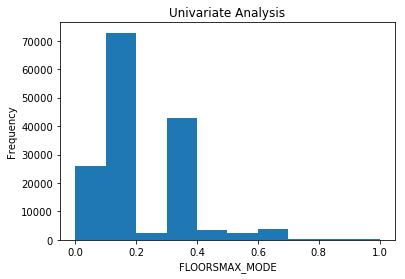

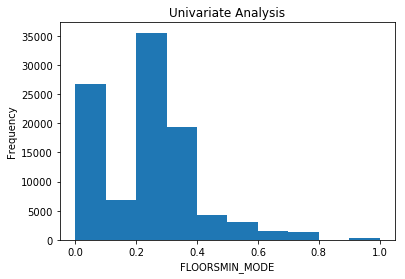

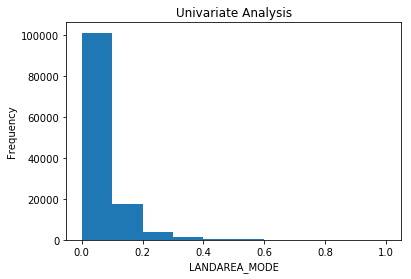

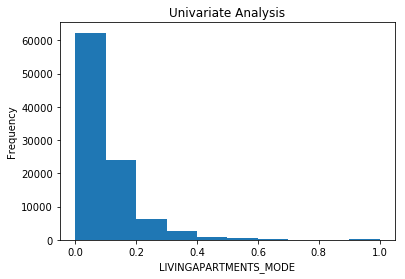

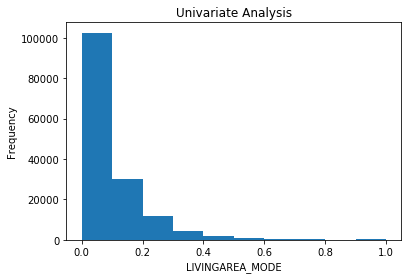

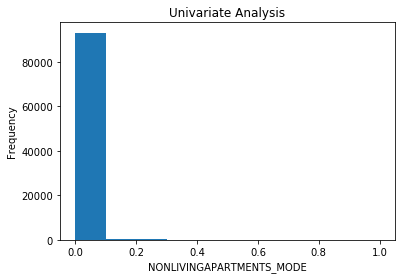

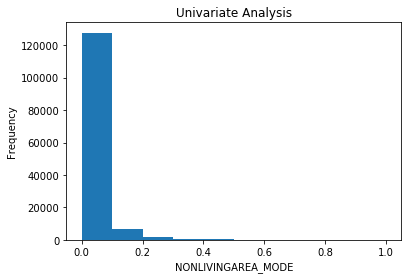

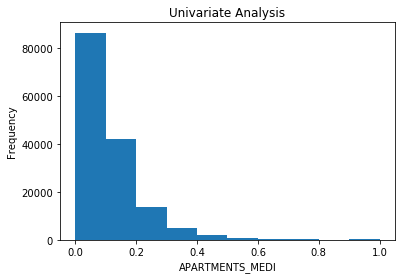

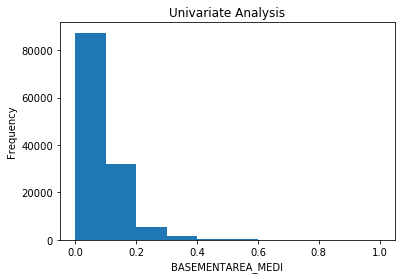

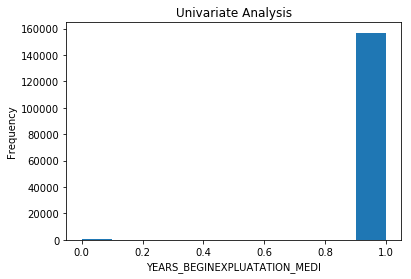

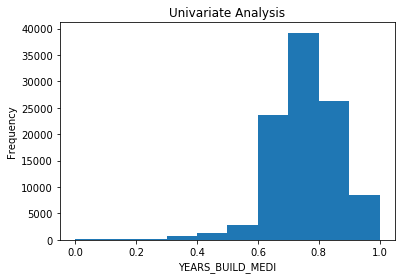

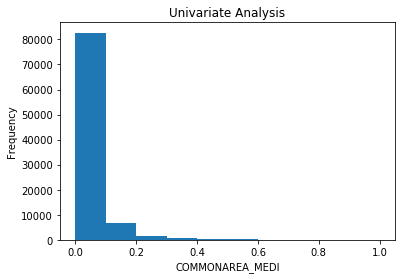

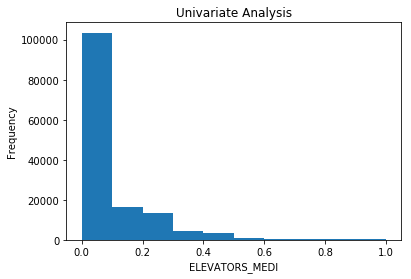

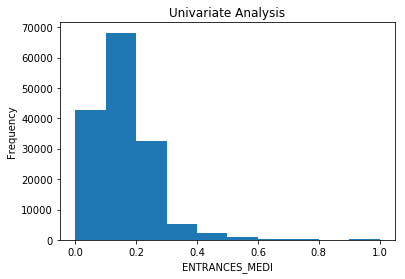

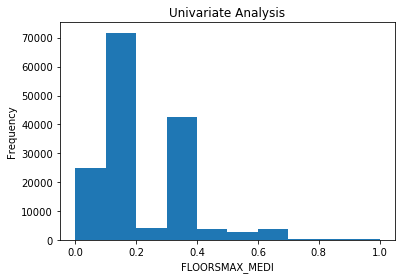

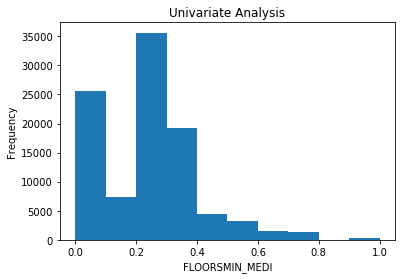

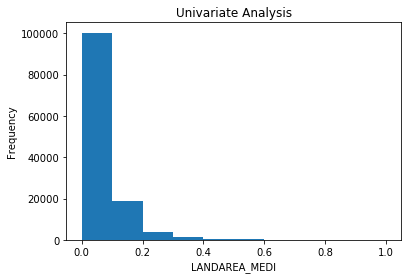

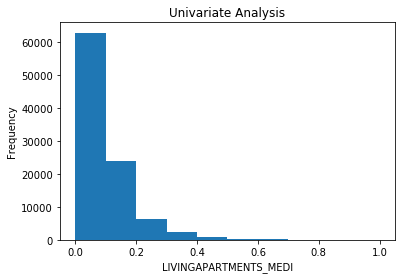

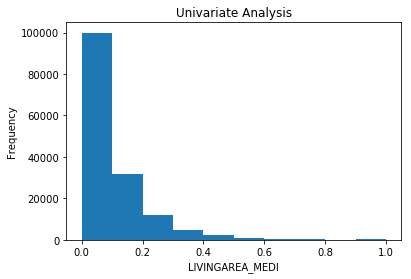

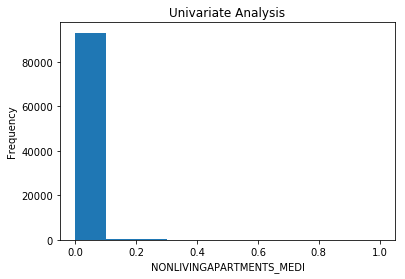

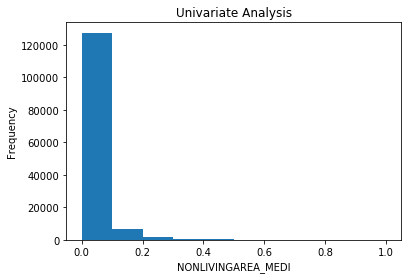

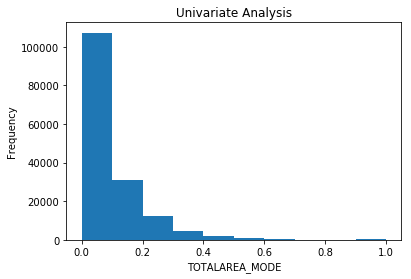

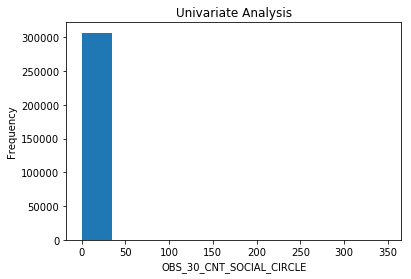

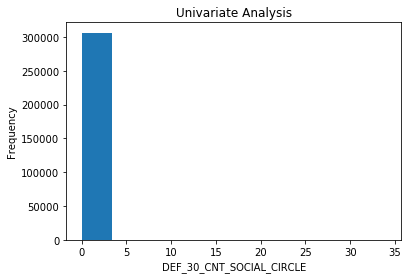

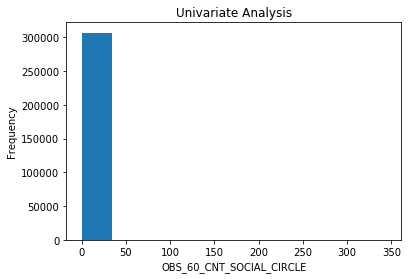

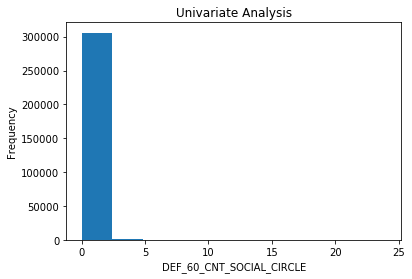

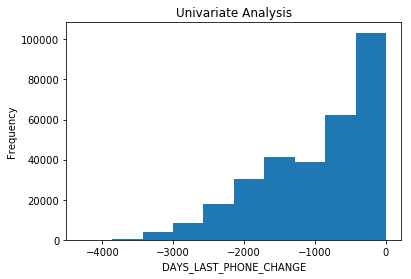

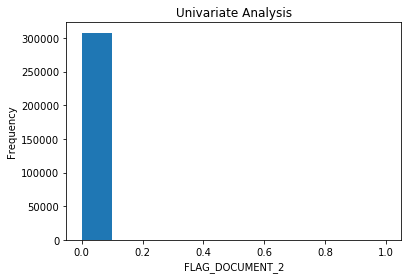

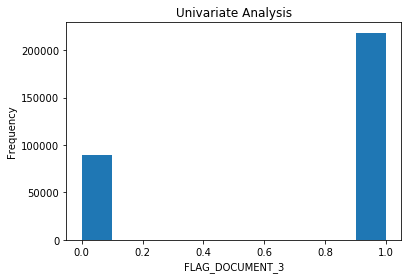

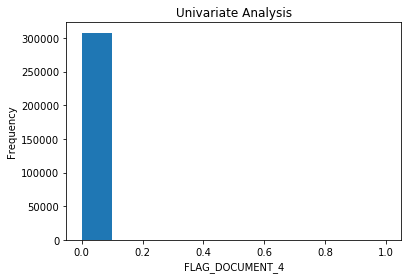

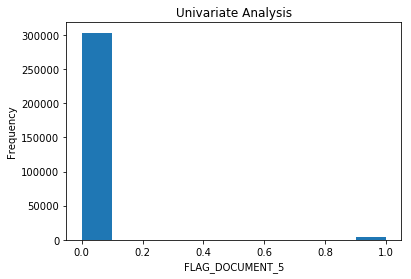

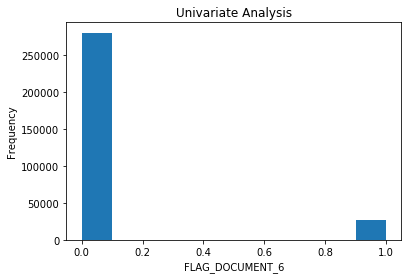

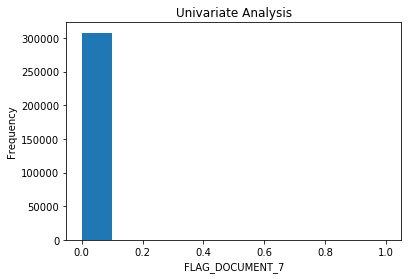

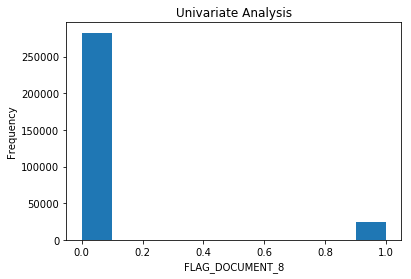

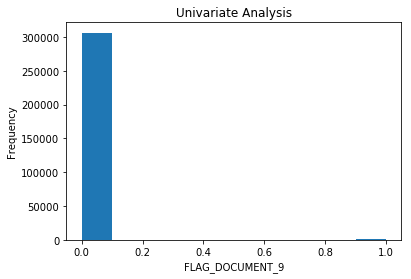

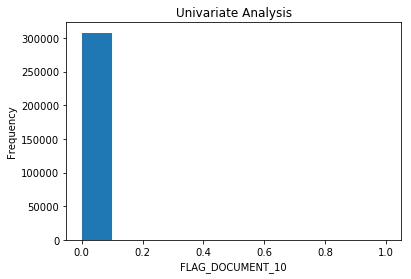

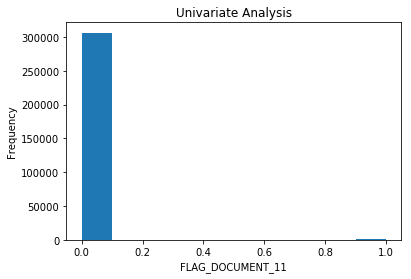

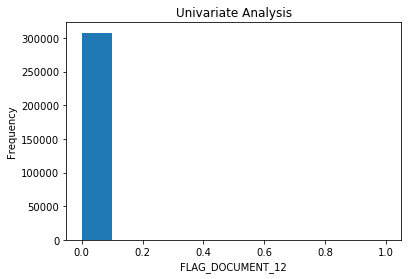

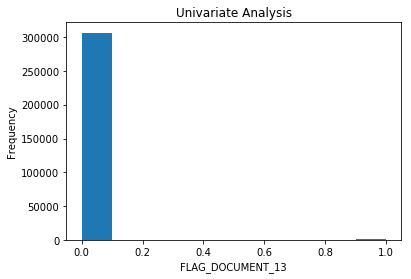

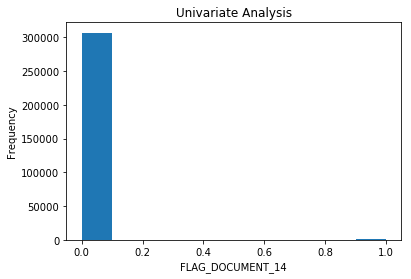

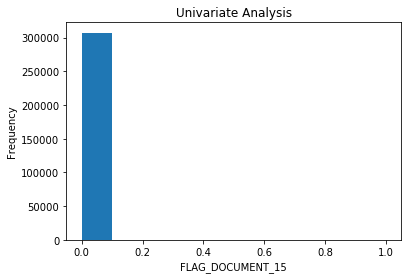

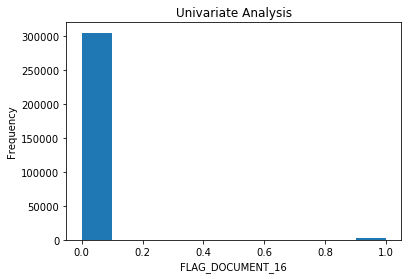

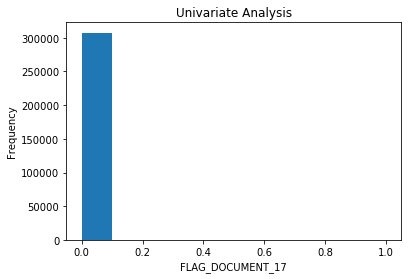

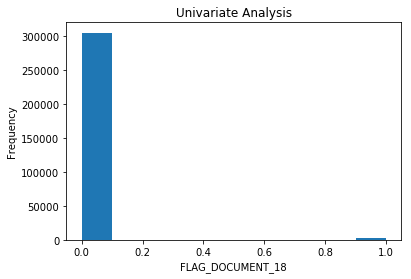

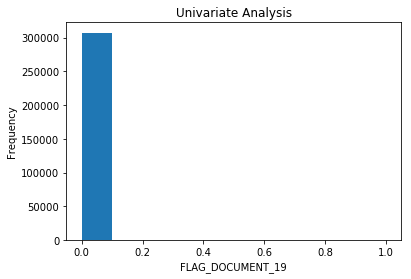

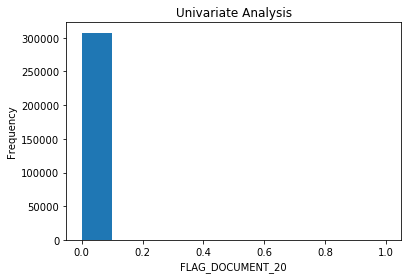

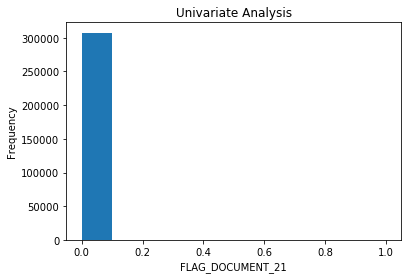

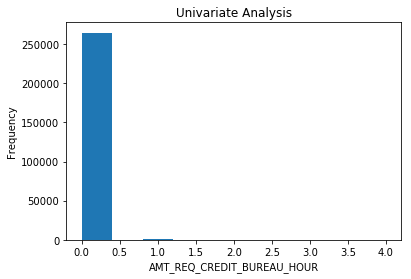

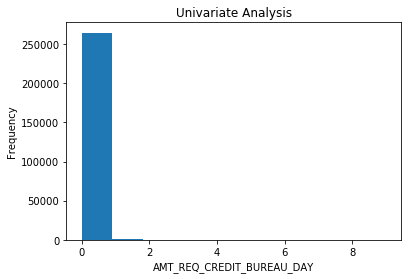

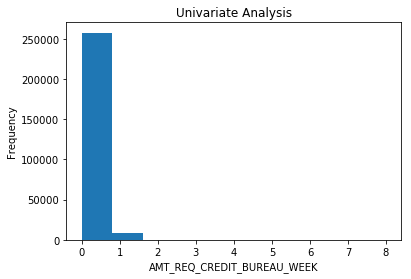

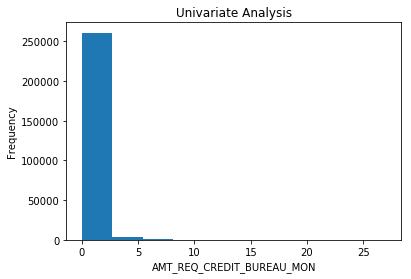

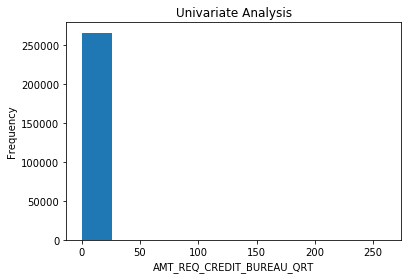

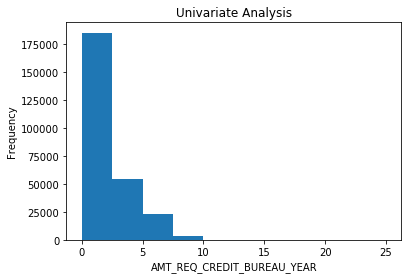

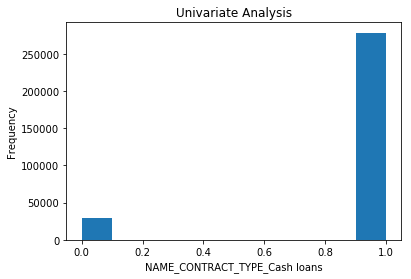

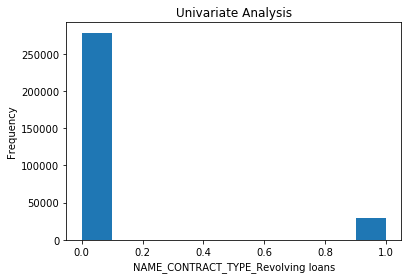

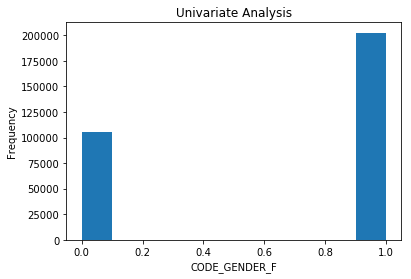

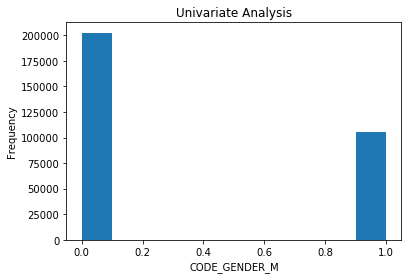

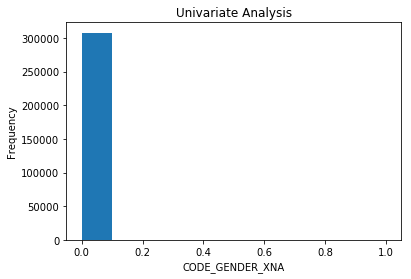

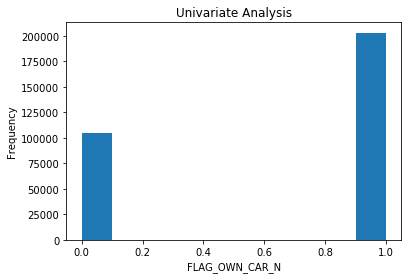

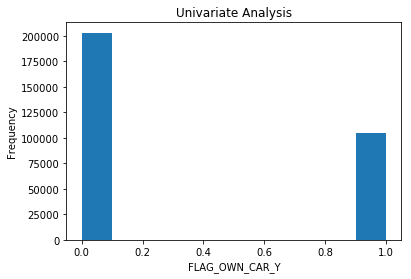

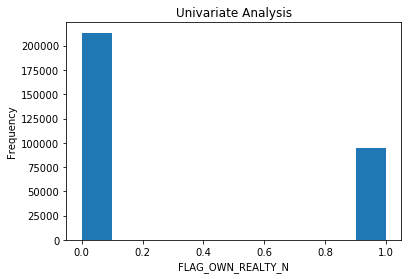

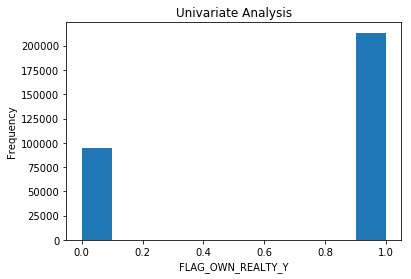

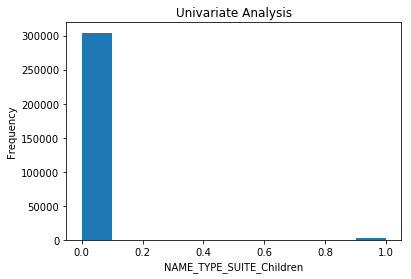

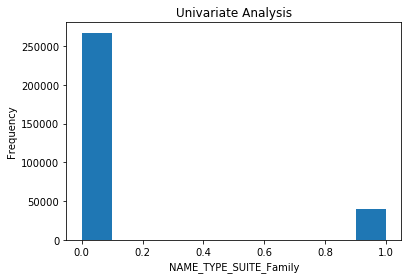

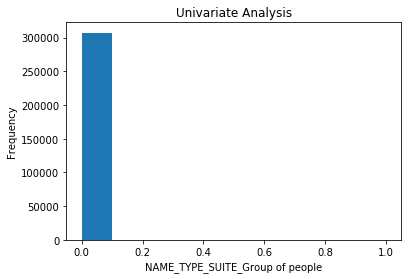

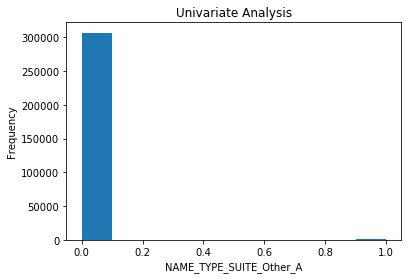

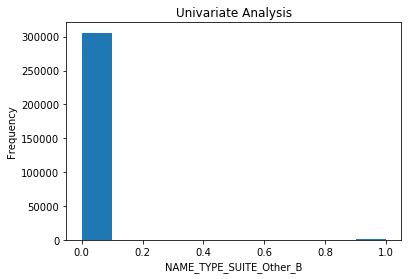

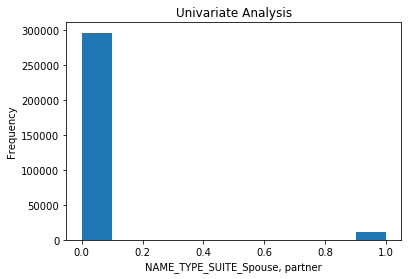

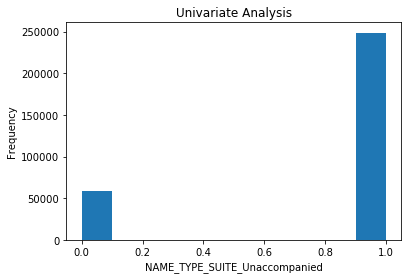

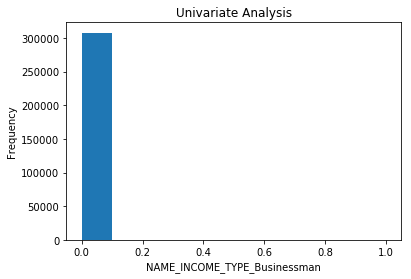

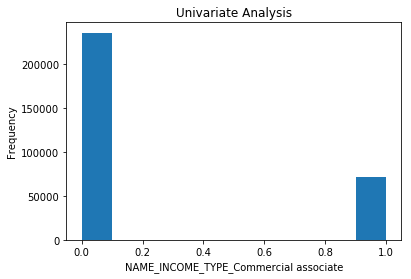

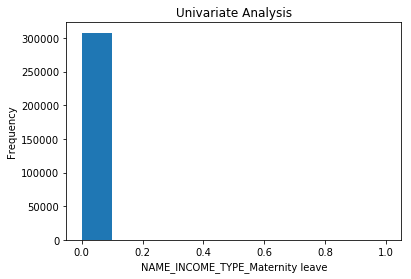

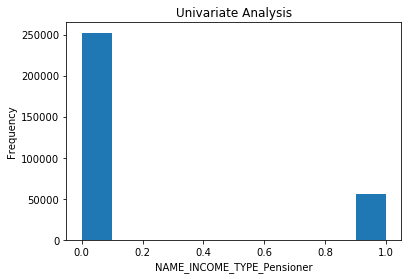

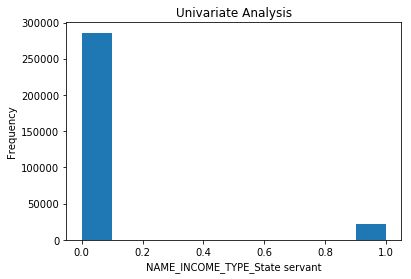

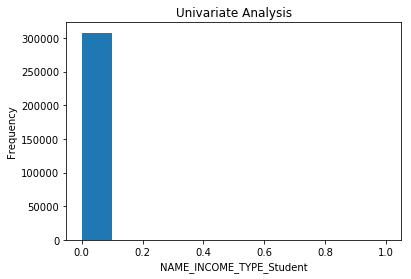

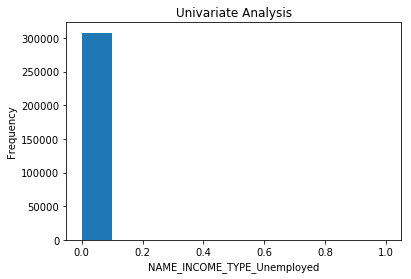

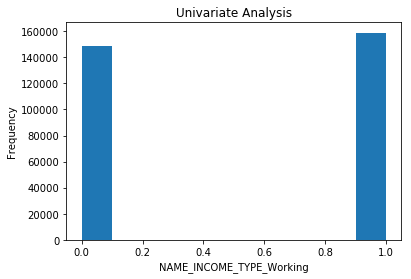

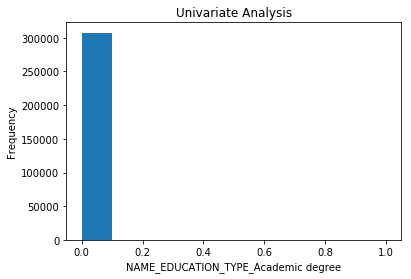

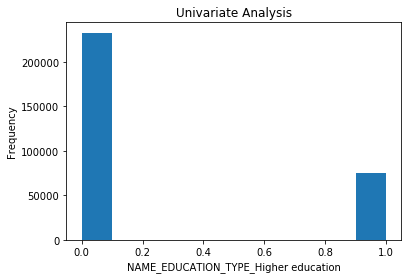

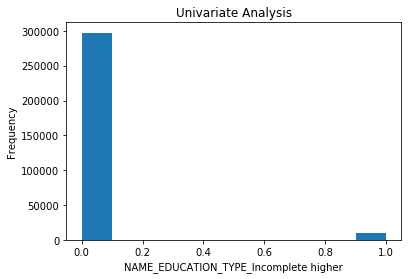

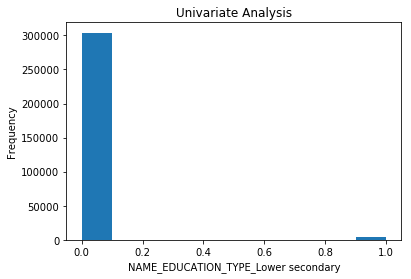

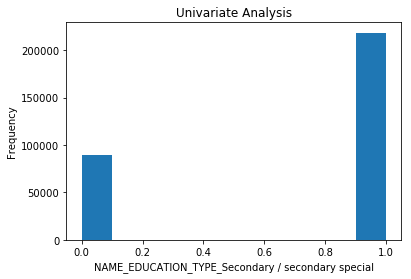

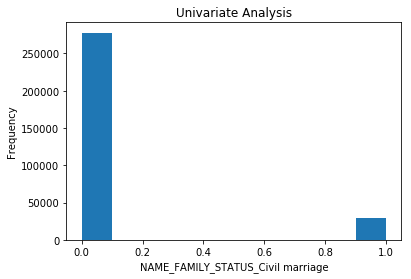

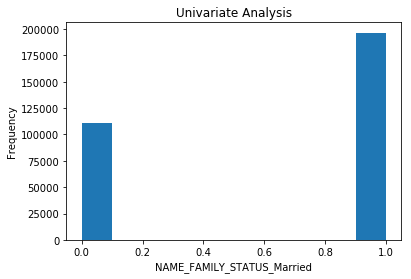

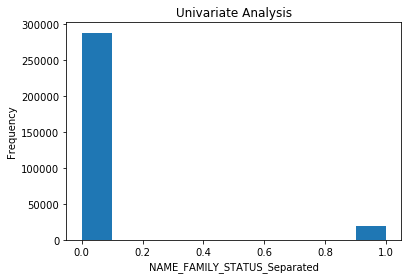

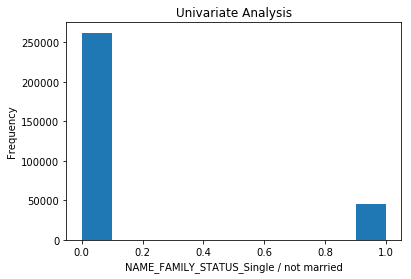

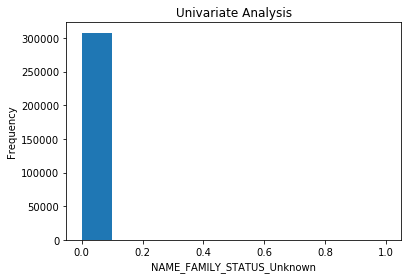

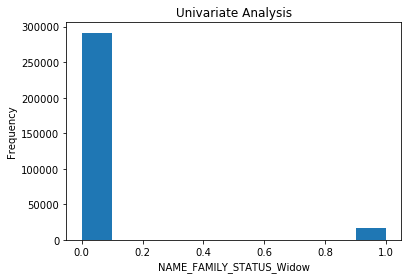

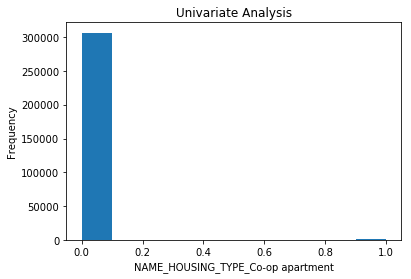

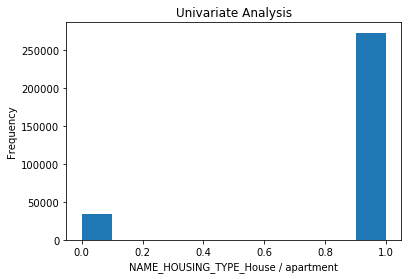

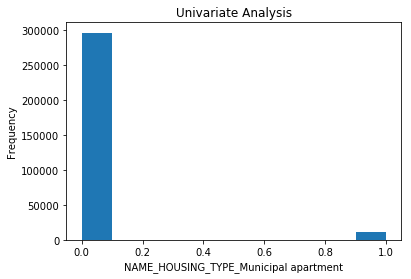

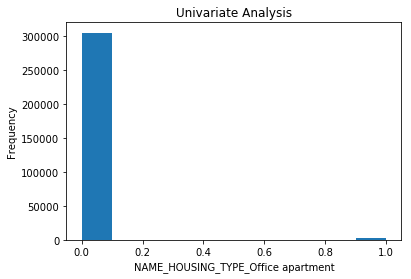

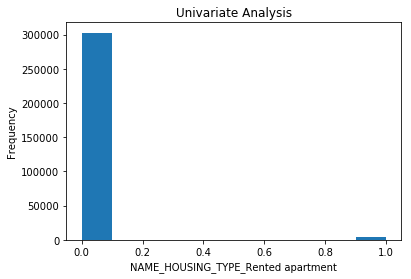

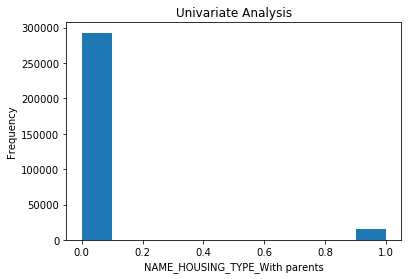

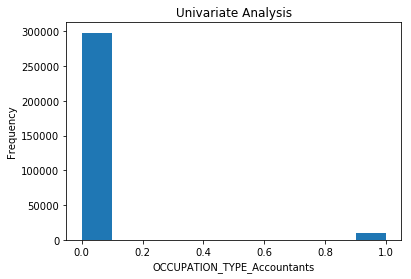

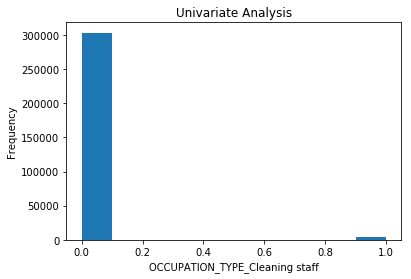

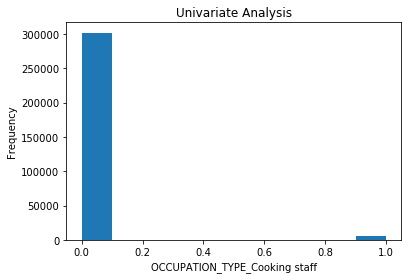

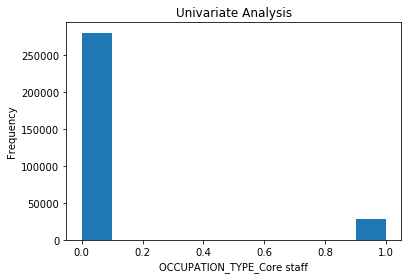

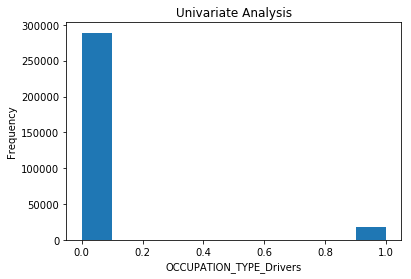

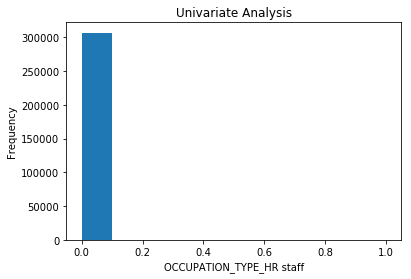

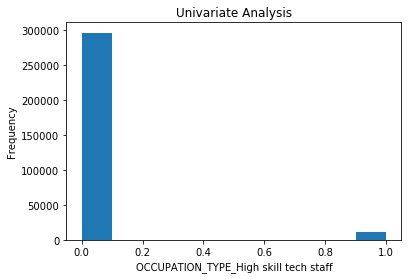

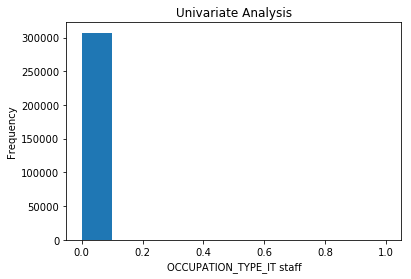

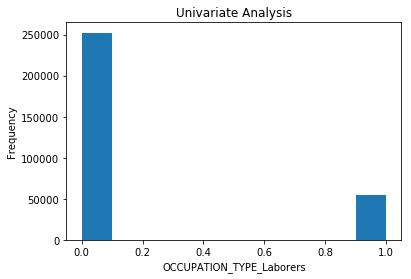

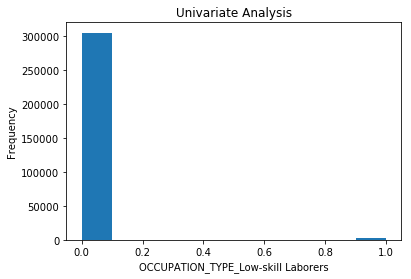

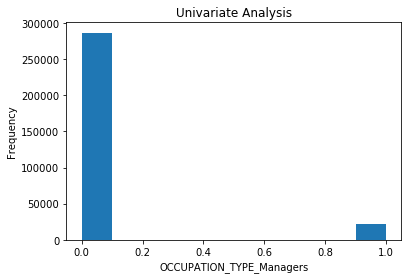

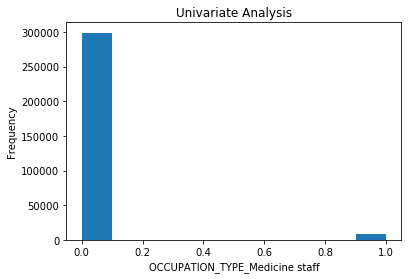

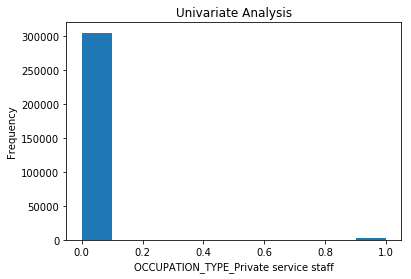

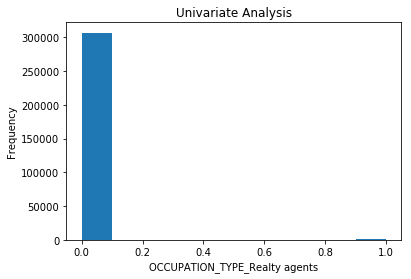

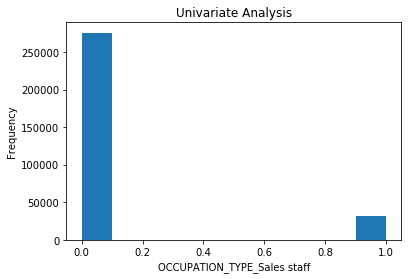

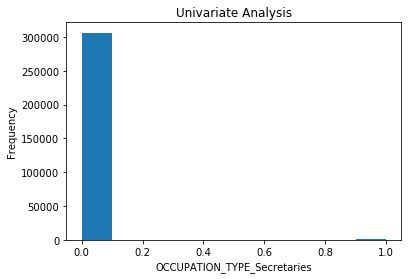

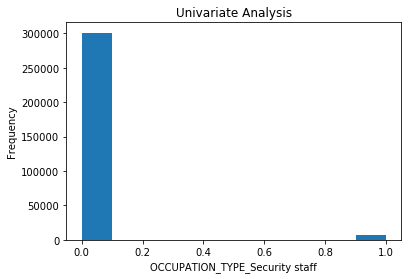

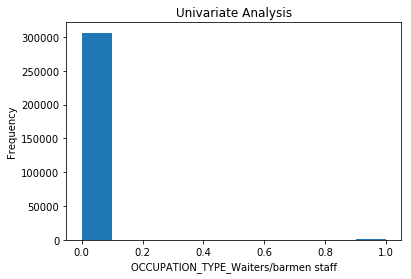

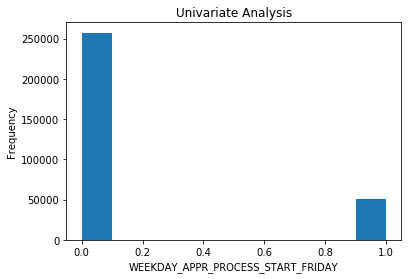

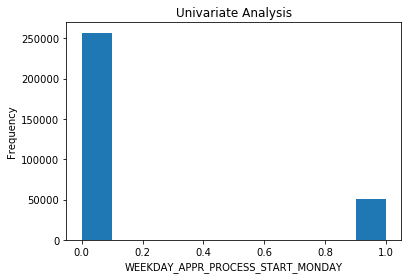

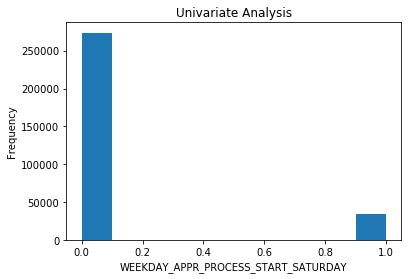

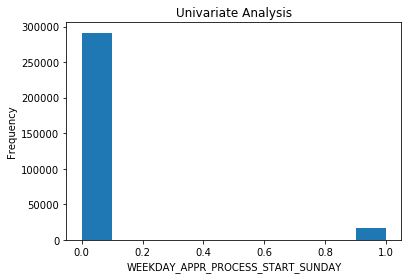

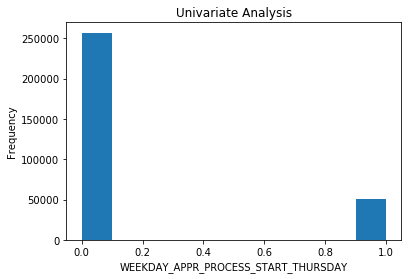

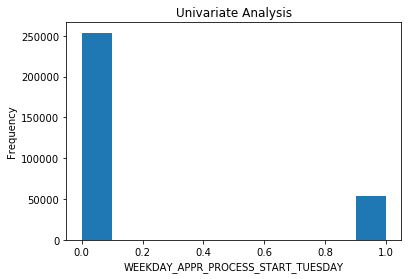

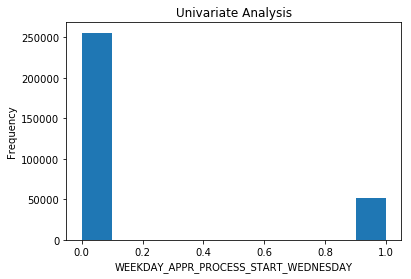

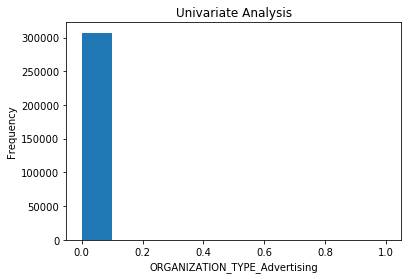

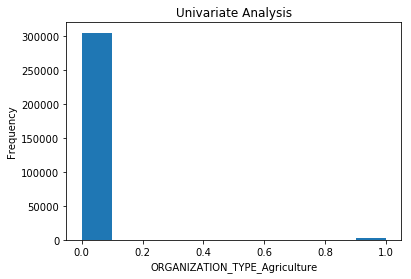

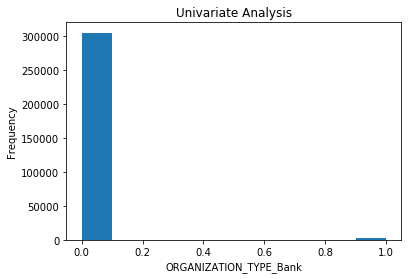

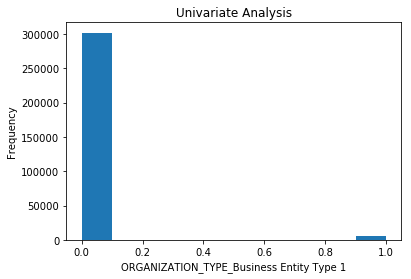

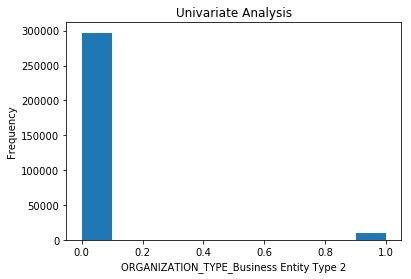

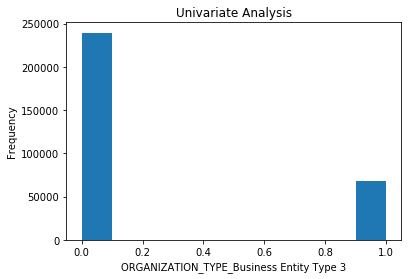

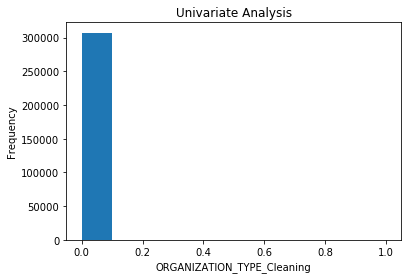

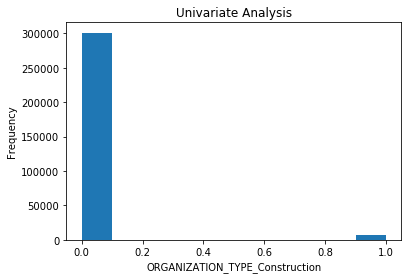

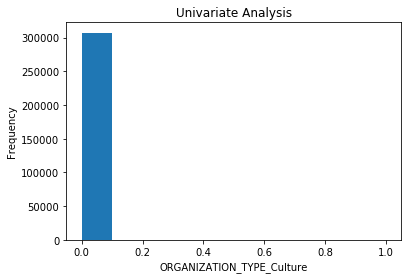

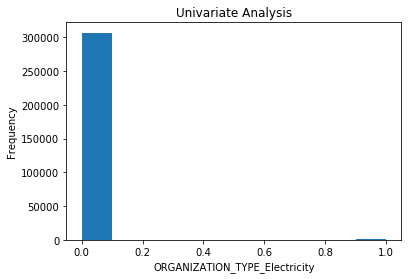

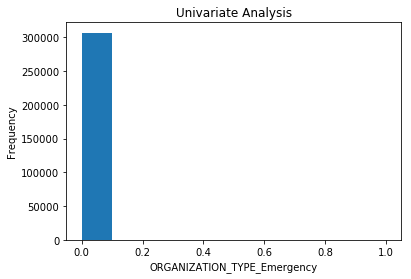

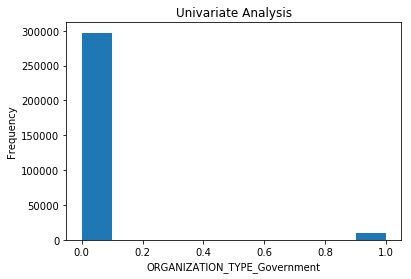

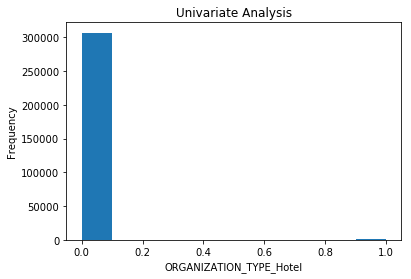

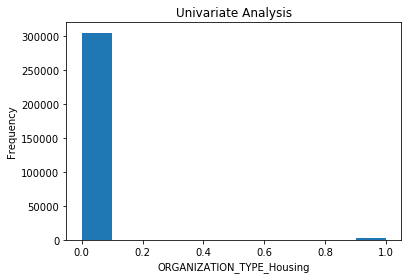

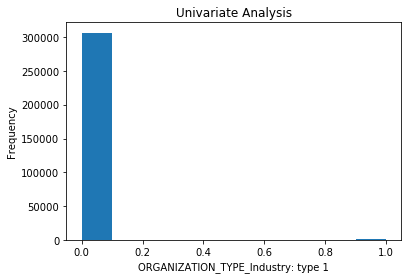

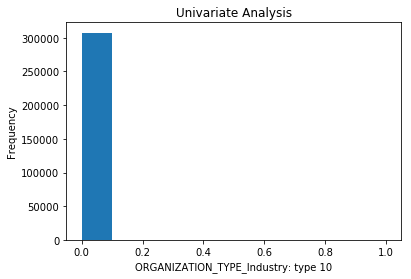

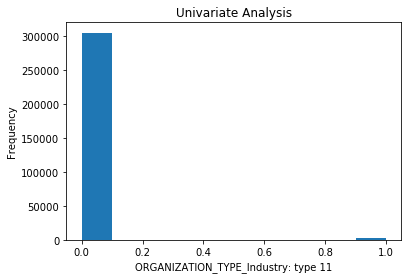

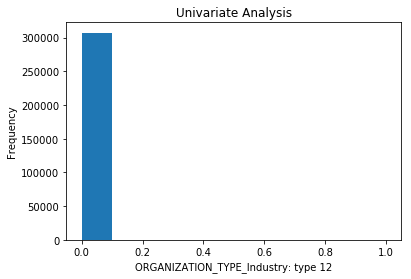

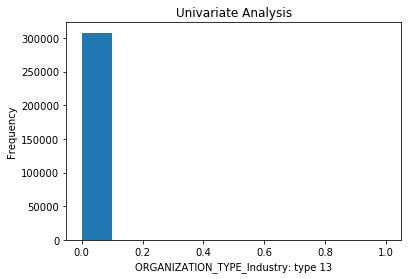

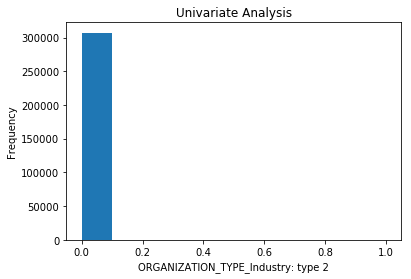

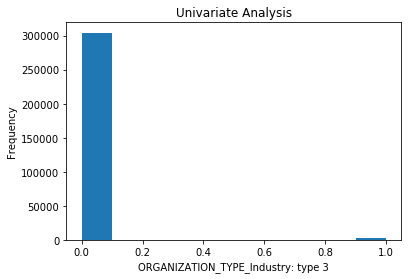

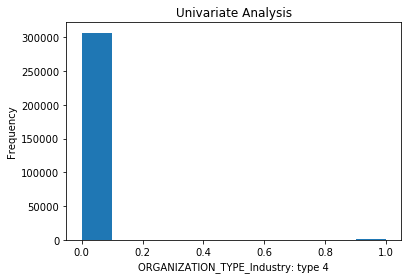

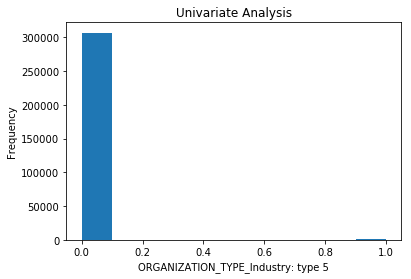

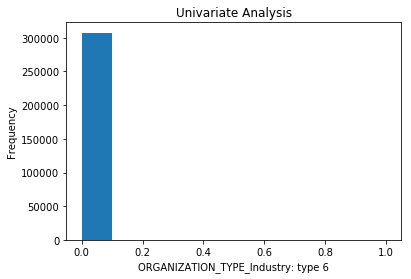

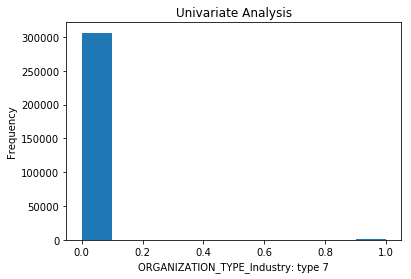

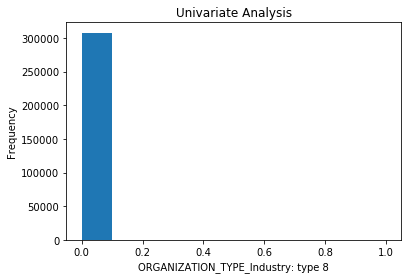

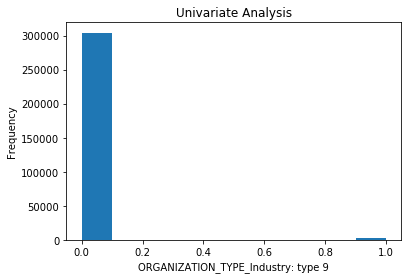

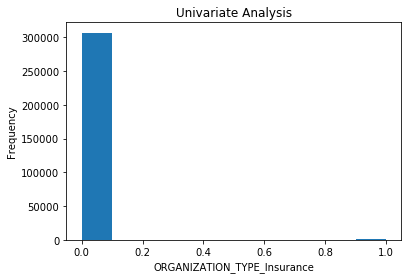

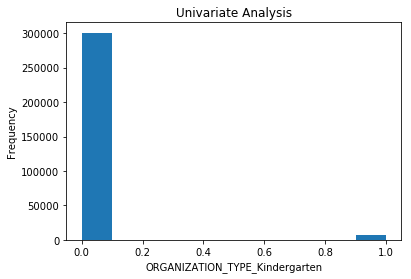

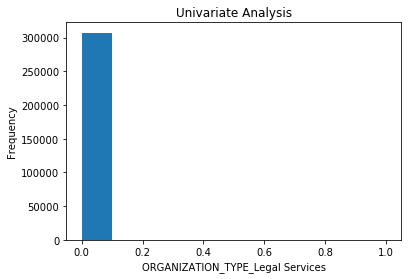

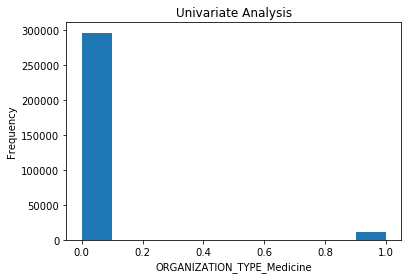

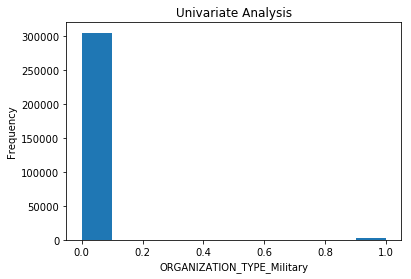

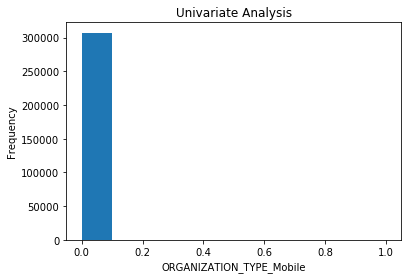

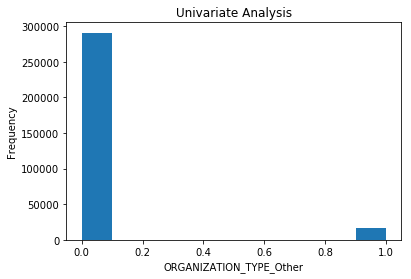

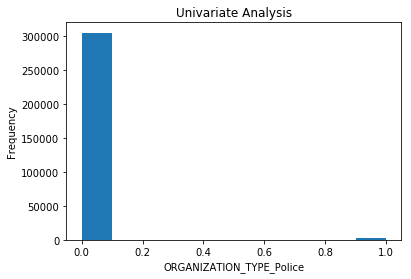

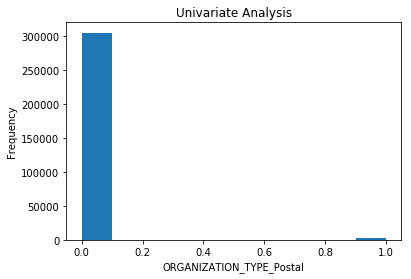

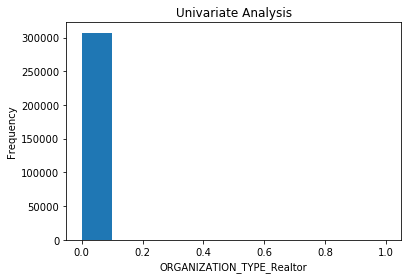

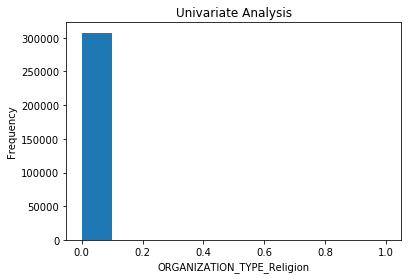

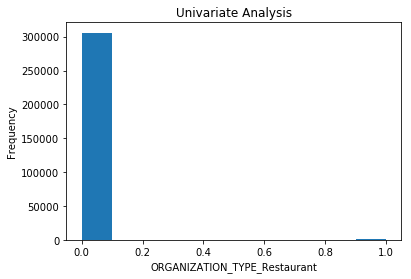

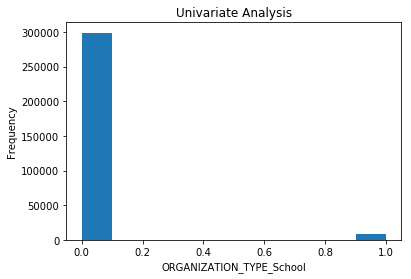

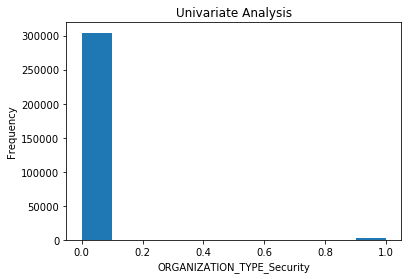

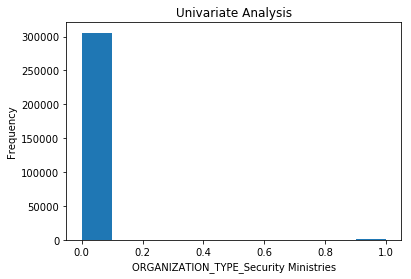

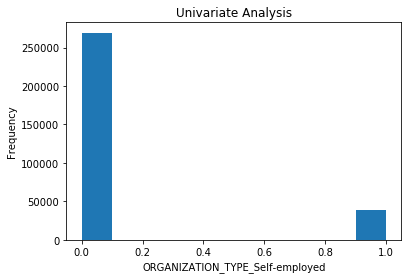

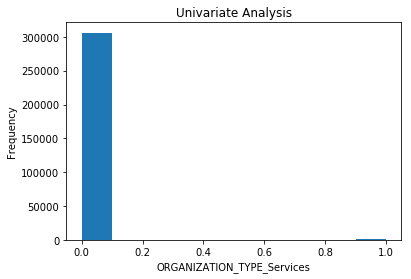

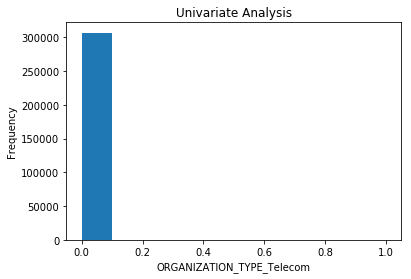

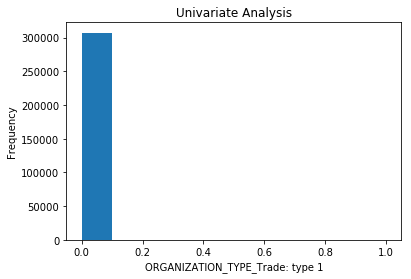

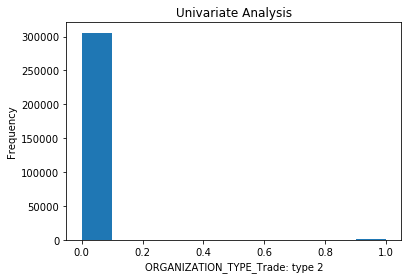

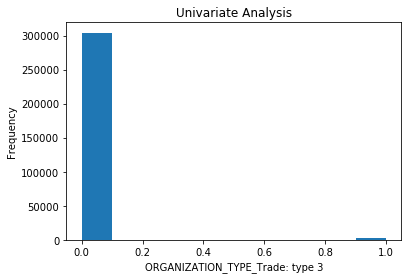

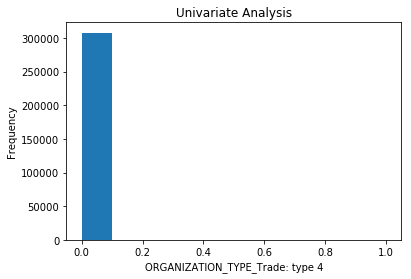

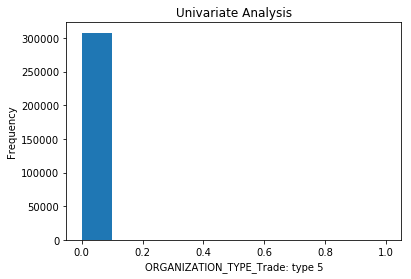

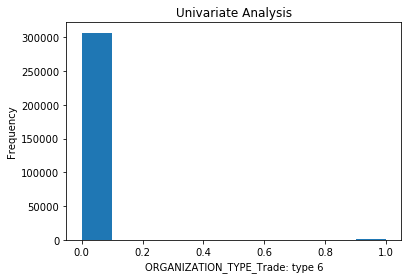

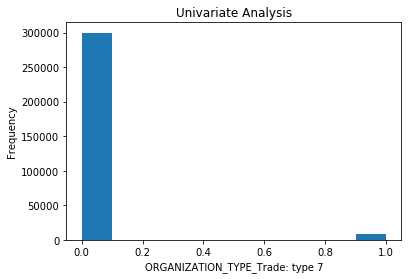

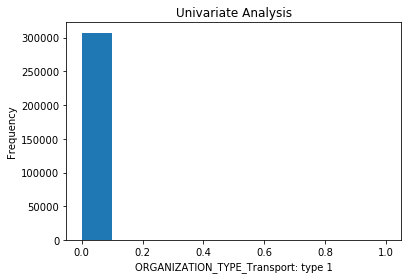

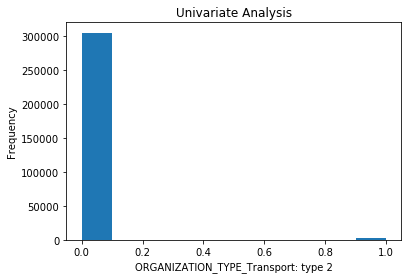

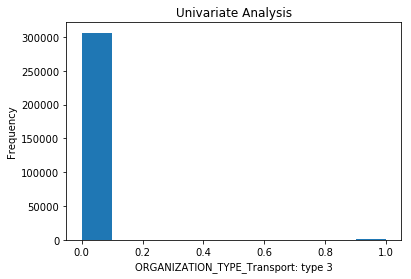

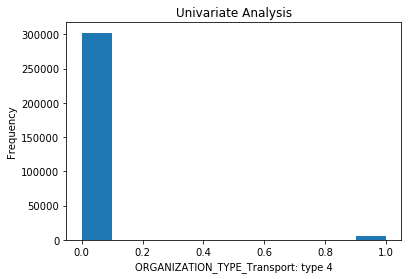

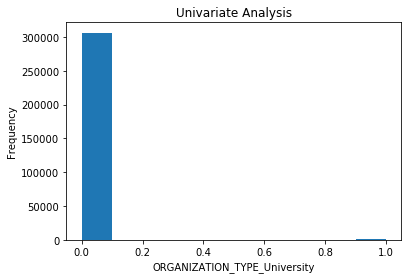

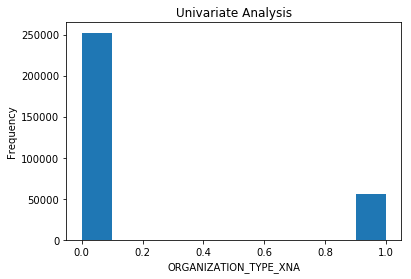

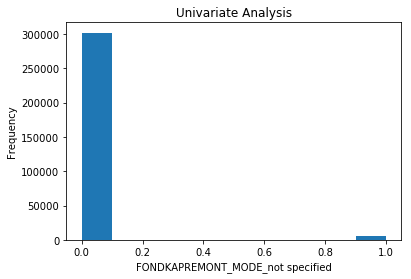

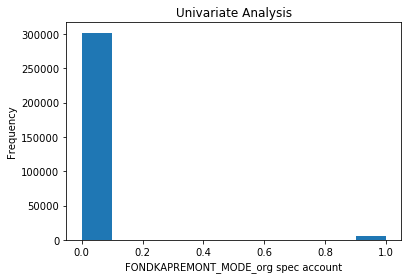

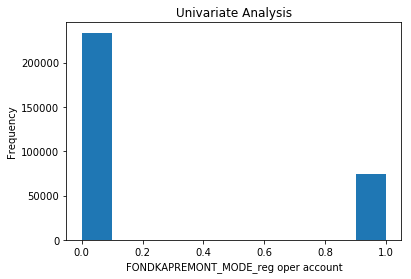

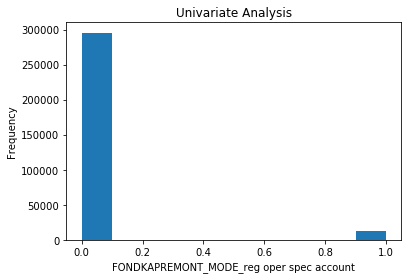

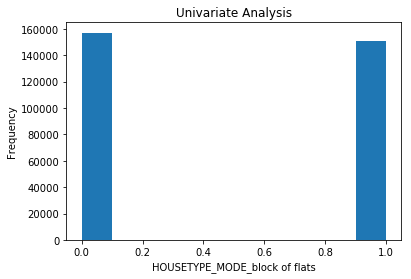

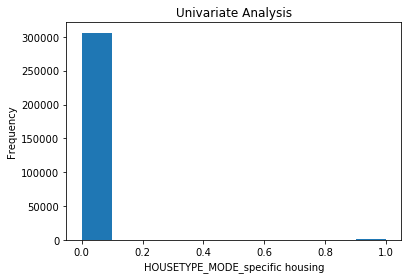

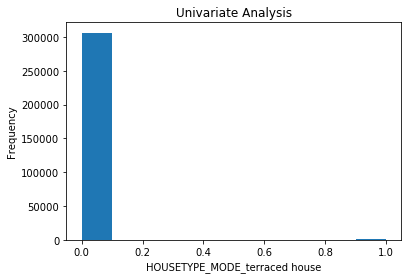

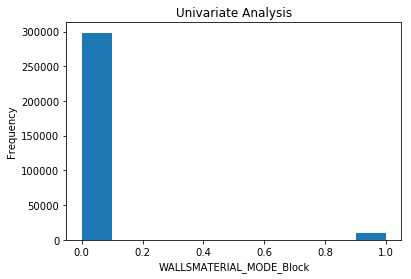

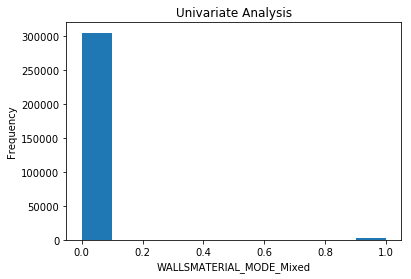

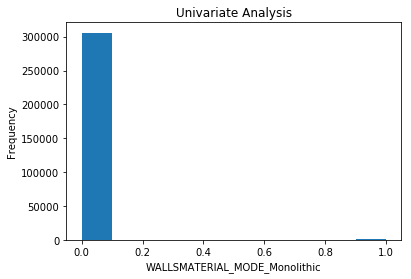

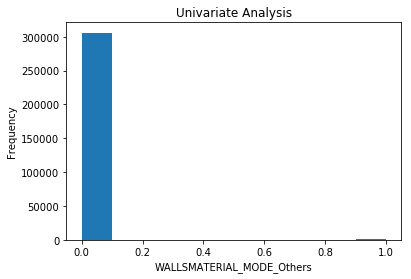

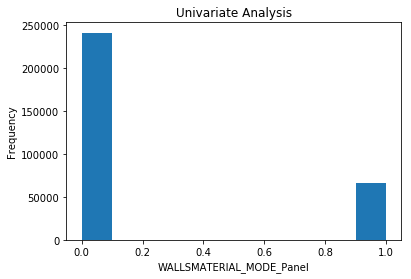

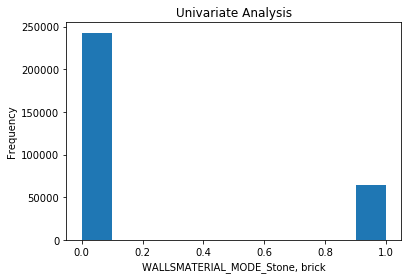

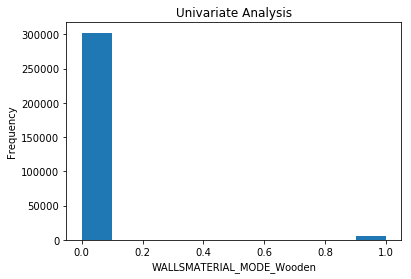

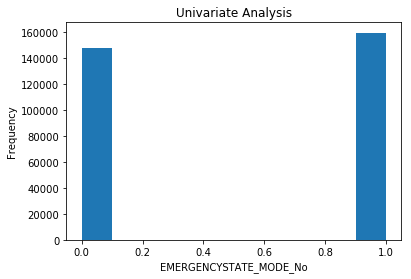

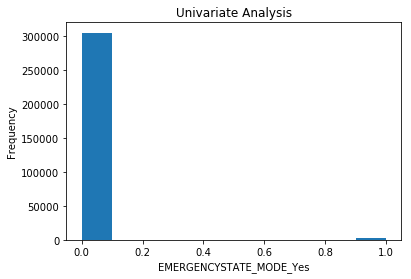

In [240]:
for i, col in enumerate(oneHot.columns):
    plt.figure(i)
    plt.hist(oneHot[col].dropna())
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title('Univariate Analysis')
    plt.show()

In [12]:
xgb=oneHot.drop('SK_ID_CURR', 1)

In [13]:
X, y = xgb.iloc[:, 1:],xgb.iloc[:,0]

In [14]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [54]:
model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-auc:0.689657
[1]	validation_0-auc:0.692176
[2]	validation_0-auc:0.702129
[3]	validation_0-auc:0.702924
[4]	validation_0-auc:0.703974
[5]	validation_0-auc:0.705011
[6]	validation_0-auc:0.706404
[7]	validation_0-auc:0.706633
[8]	validation_0-auc:0.707582
[9]	validation_0-auc:0.708047
[10]	validation_0-auc:0.708971
[11]	validation_0-auc:0.709588
[12]	validation_0-auc:0.711784
[13]	validation_0-auc:0.711933
[14]	validation_0-auc:0.713503
[15]	validation_0-auc:0.714469
[16]	validation_0-auc:0.715698
[17]	validation_0-auc:0.715766
[18]	validation_0-auc:0.71678
[19]	validation_0-auc:0.718196
[20]	validation_0-auc:0.719132
[21]	validation_0-auc:0.720118
[22]	validation_0-auc:0.720941
[23]	validation_0-auc:0.721851
[24]	validation_0-auc:0.722725
[25]	validation_0-auc:0.723464
[26]	validation_0-auc:0.724555
[27]	validation_0-auc:0.725136
[28]	validation_0-auc:0.725928
[29]	validation_0-auc:0.727782
[30]	validation_0-auc:0.728286
[31]	validation_0-auc:0.728481
[32]	validation_0-a

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)
#ROCAUC

0.7537617521487563

In [19]:
accuracy_score(y_test, predictions)
#accuracy

0.919560862665522

In [64]:
params = {"objective":"binary:logistic"}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10, metrics="auc", seed=42, stratified=True)

In [70]:
print((cv_results["test-auc-mean"]).tail(1))

9    0.737258
Name: test-auc-mean, dtype: float64


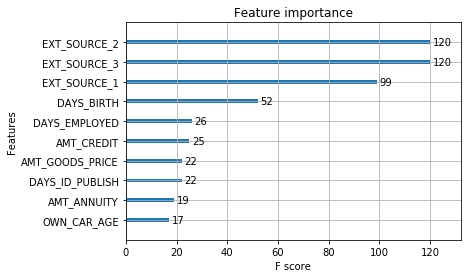

In [67]:
xgb.plot_importance(model, max_num_features=10)

In [132]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2, missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.977
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           1.53e-75
Time:                        23:07:30   Log-Likelihood:                 615.02
No. Observations:               11351   AIC:                            -784.0
Df Residuals:                   11128   BIC:                             852.1
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [133]:
est2.pvalues.sort_values().head(10)

EXT_SOURCE_3                           7.045407e-45
EXT_SOURCE_2                           1.875063e-21
EXT_SOURCE_1                           8.472243e-20
FLAG_DOCUMENT_3                        1.041227e-04
DAYS_BIRTH                             2.002064e-04
ORGANIZATION_TYPE_Transport: type 3    3.973430e-04
AMT_GOODS_PRICE                        8.102063e-04
AMT_ANNUITY                            1.264853e-03
FLAG_DOCUMENT_8                        1.386805e-03
AMT_INCOME_TOTAL                       1.495637e-03
dtype: float64